In [1]:
import numpy as np
import pandas as pd
import csv, os

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# load & review data

In [2]:
styles = pd.read_excel('LOC_NaughtyBoy/abv_ibu_comp.xlsx')
styles.rename(columns={'nonsense':'style'}, inplace=True)
print styles.shape
print styles.head()
print styles['style'].value_counts()
styles.describe()

(108, 3)
    abv   ibu style
0   8.4  54.0  bipa
1   8.5  65.0  bipa
2  10.0  85.0  bipa
3   8.5  65.0  bipa
4   8.0  69.0  bipa
stout    36
ipa      36
bipa     36
Name: style, dtype: int64


,abv,ibu
count,108.000000,71.000000
mean,7.005185,60.281690
std,1.336765,19.609169
min,3.000000,25.000000
25%,6.500000,45.000000
50%,6.800000,62.000000
75%,7.500000,70.000000
max,12.800000,110.000000


# remove NaN

In [3]:
styles_noNAN = styles.dropna()

print styles_noNAN.shape
print styles_noNAN.head()
print styles_noNAN['style'].value_counts()
styles_noNAN.describe()

(71, 3)
    abv   ibu style
0   8.4  54.0  bipa
1   8.5  65.0  bipa
2  10.0  85.0  bipa
3   8.5  65.0  bipa
4   8.0  69.0  bipa
ipa      28
bipa     27
stout    16
Name: style, dtype: int64


,abv,ibu
count,71.000000,71.000000
mean,7.010704,60.281690
std,1.350965,19.609169
min,3.000000,25.000000
25%,6.500000,45.000000
50%,6.800000,62.000000
75%,7.650000,70.000000
max,11.700000,110.000000


# initial scatter plot

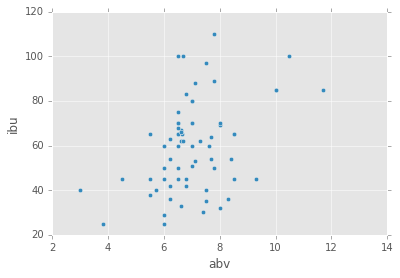

In [4]:
styles_noNAN.plot(kind='scatter', x='abv', y='ibu')

# differentiated plot

In [5]:
bipa = styles_noNAN['style'] == 'bipa'
ipa = styles_noNAN['style'] == 'ipa'
stout = styles_noNAN['style'] == 'stout'

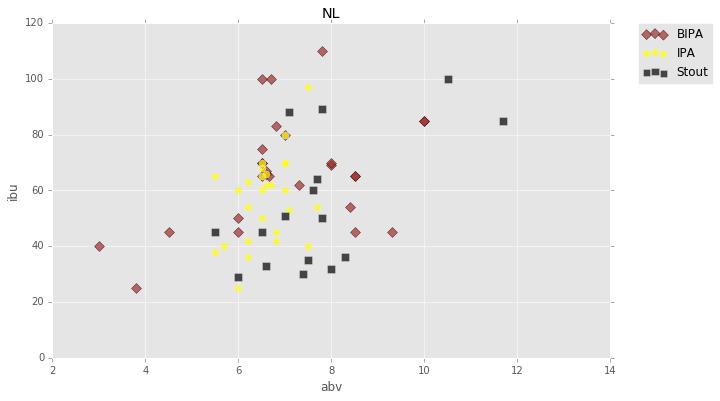

In [6]:
plt.figure(figsize=(10,6))

plt.scatter(styles_noNAN[bipa]['abv'], styles_noNAN[bipa]['ibu'], c='brown', edgecolor='k', marker='D', s=50, alpha=.7, label='BIPA')
plt.scatter(styles_noNAN[ipa]['abv'], styles_noNAN[ipa]['ibu'], c='yellow', marker='o', s=50, alpha=.7, label='IPA')
plt.scatter(styles_noNAN[stout]['abv'], styles_noNAN[stout]['ibu'], c='black', marker='s', s=50, alpha=.7, label='Stout')

plt.title('NL')
plt.xlabel('abv')
plt.ylabel('ibu')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 1-nn Euclidean measures
source: BuildingMLSystems_packt, chapter 2: Learning How to Classify with Real-world Examples

In [7]:
def distance(p0, p1):
    # squared Euclidean distance
    return np.sum( (p0-p1)**2 )

def nn_classify(training_set, training_labels, new_example):
    dists = np.array([distance(t, new_example) for t in training_set])
    nearest = dists.argmin()
    return training_labels[nearest]

In [8]:
beers = np.array(styles_noNAN[['abv', 'ibu']])
labels = np.array(styles_noNAN['style'])

print beers[:5]
print labels[:5]

nn_classify(beers, labels, [8., 60.])

[[  8.4  54. ]
 [  8.5  65. ]
 [ 10.   85. ]
 [  8.5  65. ]
 [  8.   69. ]]
[u'bipa' u'bipa' u'bipa' u'bipa' u'bipa']


u'stout'

# color code plotting area

In [9]:
yIBU = np.linspace(0, 120)
xABV = np.linspace(2, 14)

xyGrid = []
xyLab = []

for x in np.nditer(xABV):
    for y in np.nditer(yIBU):
        xyGrid.append([x, y])
        label = nn_classify(beers, labels, (x,y))
        xyLab.append(label)

xyGrid = np.array(xyGrid)
xyLab = np.array(xyLab)
print len(xyGrid)
print len(xyLab)
print xyLab[:10]

2500
2500
[u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa'
 u'bipa']


{u'bipa': 'brown', u'ipa': 'yellow', u'stout': 'black'}


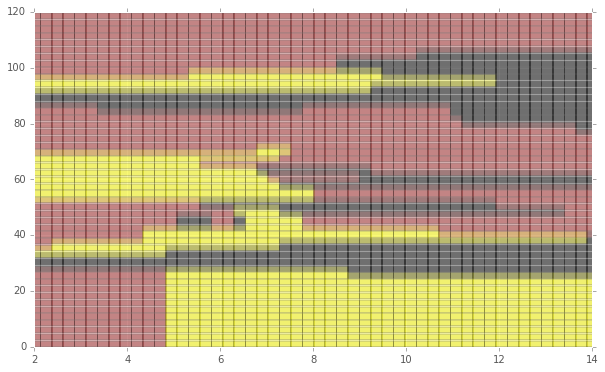

In [10]:
colors = {a:b for a,b in zip(np.unique(labels), ['brown', 'yellow', 'black'])}
print colors

plt.figure(figsize=(10,6))

for dot in range(len(xyGrid)):
    plt.plot(xyGrid[dot,0], xyGrid[dot,1], marker='s', ms=12, alpha=.3, c=colors[xyLab[dot]])

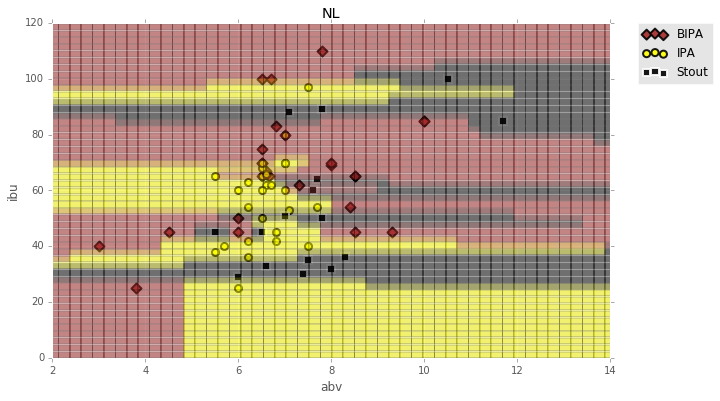

In [11]:
plt.figure(figsize=(10,6))

for dot in range(len(xyGrid)):
    plt.plot(xyGrid[dot,0], xyGrid[dot,1], marker='s', ms=12, alpha=.3, c=colors[xyLab[dot]])

plt.scatter(styles_noNAN[bipa]['abv'], styles_noNAN[bipa]['ibu'], c='brown', edgecolor='k', lw=2, marker='D', s=50, alpha=.9, label='BIPA')
plt.scatter(styles_noNAN[ipa]['abv'], styles_noNAN[ipa]['ibu'], c='yellow', edgecolor='k', lw=2, marker='o', s=50, alpha=.9, label='IPA')
plt.scatter(styles_noNAN[stout]['abv'], styles_noNAN[stout]['ibu'], c='black', edgecolor='w', lw=2, marker='s', s=50, alpha=.9, label='Stout')

plt.title('NL')
plt.xlabel('abv')
plt.ylabel('ibu')

plt.ylim(0, 120)
plt.xlim(2, 14)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# standardize features (normalize to z-scores)

In [12]:
# subtract the mean for each feature:
features = beers.copy()
features -= features.mean(axis=0)
# divide each feature by its standard deviation
features /= features.std(axis=0)

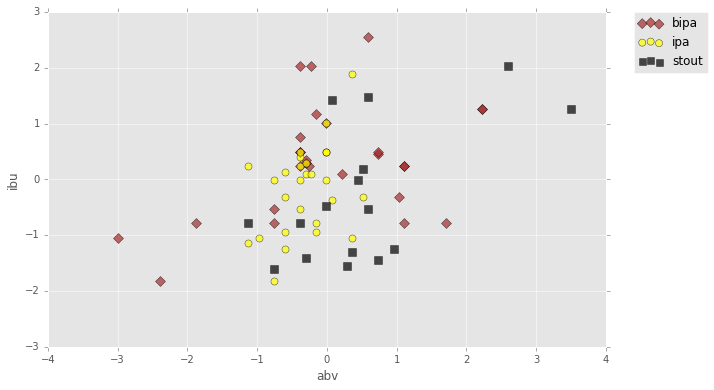

In [13]:
markers = {a:b for a,b in zip(np.unique(labels), ['D', 'o', 's'])}
colors = {a:b for a,b in zip(np.unique(labels), ['brown', 'yellow', 'black'])}

plt.figure(figsize=(10,6))

for beer in markers:
    current_beer = labels == beer
    plt.scatter(features[current_beer][:,0], features[current_beer][:,1], 
                marker=markers[beer], c=colors[beer], edgecolor='k', s=50, alpha=.7, label=beer
               )
    
plt.xlabel('abv')
plt.ylabel('ibu')

# plt.ylim((.75, 1.))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
yIBU2 = np.linspace(-3, 3)
xABV2 = np.linspace(-4, 4)

xyGrid2 = []
xyLab2 = []

for x in np.nditer(xABV2):
    for y in np.nditer(yIBU2):
        xyGrid2.append([x, y])
        label = nn_classify(features, labels, (x,y))
        xyLab2.append(label)

xyGrid2 = np.array(xyGrid2)
xyLab2 = np.array(xyLab2)
print len(xyGrid2)
print len(xyLab2)
print xyLab2[:10]

2500
2500
[u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa'
 u'bipa']


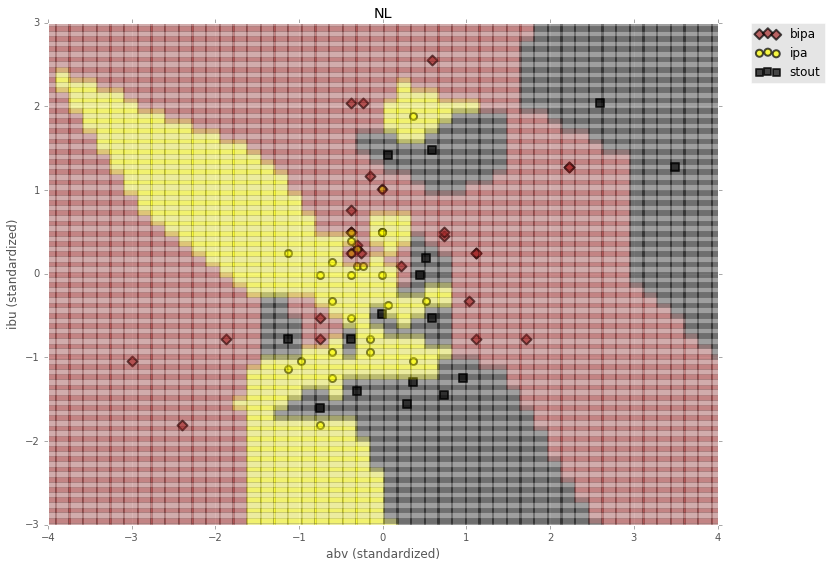

In [15]:
markers = {a:b for a,b in zip(np.unique(labels), ['D', 'o', 's'])}
colors = {a:b for a,b in zip(np.unique(labels), ['brown', 'yellow', 'black'])}

plt.figure(figsize=(12,9))

for dot in range(len(xyGrid2)):
    plt.plot(xyGrid2[dot,0], xyGrid2[dot,1], marker='s', ms=15, alpha=.3, c=colors[xyLab2[dot]])

for beer in markers:
    current_beer = labels == beer
    plt.scatter(features[current_beer][:,0], features[current_beer][:,1], 
                marker=markers[beer], c=colors[beer], edgecolor='k', lw=2, s=50, alpha=.7, label=beer
               )

plt.title('NL')
plt.xlabel('abv (standardized)')
plt.ylabel('ibu (standardized)')
plt.ylim(-3, 3)
plt.xlim(-4, 4)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# next

1. plot LOC
2. shuffle training data and do k-fold testing to identify best knn
3. use knn from #2 to 'determine' LOC style

sources: http://scikit-learn.org/stable/modules/cross_validation.html <br/>
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html <br/>
https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb

In [16]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [25]:
print features[:5]
print labels[:5]

X = features
y = labels

[[ 1.0356923  -0.32262459]
 [ 1.1102403   0.24233013]
 [ 2.2284604   1.26952054]
 [ 1.1102403   0.24233013]
 [ 0.73750027  0.44776821]]
[u'bipa' u'bipa' u'bipa' u'bipa' u'bipa']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.666666666667


In [27]:
from sklearn.cross_validation import cross_val_score

In [28]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores


[ 0.625       0.75        0.625       0.625       0.625       0.625
  0.57142857  0.33333333  0.4         0.6       ]


In [29]:
# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

0.577976190476


In [30]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

[0.52619047619047621, 0.60392857142857137, 0.4930952380952382, 0.54047619047619055, 0.57797619047619053, 0.54047619047619055, 0.5061904761904763, 0.49547619047619051, 0.52285714285714291, 0.52047619047619054, 0.49035714285714294, 0.46535714285714291, 0.46535714285714291, 0.42369047619047623, 0.47785714285714292, 0.44035714285714295, 0.46535714285714291, 0.50464285714285717, 0.49035714285714294, 0.49214285714285716, 0.47785714285714292, 0.51035714285714295, 0.48535714285714293, 0.46535714285714291, 0.48535714285714293, 0.47285714285714298, 0.48535714285714293, 0.47285714285714298, 0.47285714285714298, 0.45285714285714296]


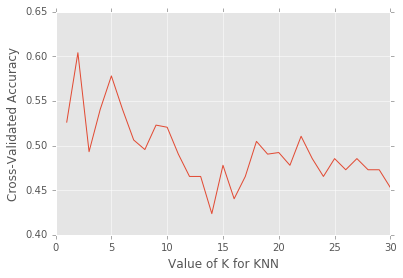

In [31]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [33]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=2)
print cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.603928571429


# revisit standardization to translate back and forth between actual numbers

In [38]:
print '\tabv\t\tibu'
# subtract the mean for each feature:
features_revisit = beers.copy()
features_mean = features_revisit.mean(axis=0)
print features_mean
features_revisit -= features_mean
# divide each feature by its standard deviation
features_std = features_revisit.std(axis=0)
print features_std
features_revisit /= features_std

	abv		ibu
[  7.01070423  60.28169014]
[  1.3414175   19.47058677]


In [40]:
# naughty boy ABV
nb_abv = 4.9
nb_abv_stand = (nb_abv - features_mean[0])/features_std[0]
print nb_abv_stand

-1.57348791369


# the ibu of NB is a mystery so we will classify for the entire y-axis range

In [64]:
nb_standardized = np.ones([50,2])
nb_standardized[:,0] = nb_standardized[:,0] * nb_abv_stand
nb_standardized[:,1] = nb_standardized[:,1] * yIBU2

print nb_standardized[:5]

[[-1.57348791 -3.        ]
 [-1.57348791 -2.87755102]
 [-1.57348791 -2.75510204]
 [-1.57348791 -2.63265306]
 [-1.57348791 -2.51020408]]


In [63]:
nb_standardized

array([[-1.57348791, -3.        ],
       [-1.57348791, -2.87755102],
       [-1.57348791, -2.75510204],
       [-1.57348791, -2.63265306],
       [-1.57348791, -2.51020408],
       [-1.57348791, -2.3877551 ],
       [-1.57348791, -2.26530612],
       [-1.57348791, -2.14285714],
       [-1.57348791, -2.02040816],
       [-1.57348791, -1.89795918],
       [-1.57348791, -1.7755102 ],
       [-1.57348791, -1.65306122],
       [-1.57348791, -1.53061224],
       [-1.57348791, -1.40816327],
       [-1.57348791, -1.28571429],
       [-1.57348791, -1.16326531],
       [-1.57348791, -1.04081633],
       [-1.57348791, -0.91836735],
       [-1.57348791, -0.79591837],
       [-1.57348791, -0.67346939],
       [-1.57348791, -0.55102041],
       [-1.57348791, -0.42857143],
       [-1.57348791, -0.30612245],
       [-1.57348791, -0.18367347],
       [-1.57348791, -0.06122449],
       [-1.57348791,  0.06122449],
       [-1.57348791,  0.18367347],
       [-1.57348791,  0.30612245],
       [-1.57348791,

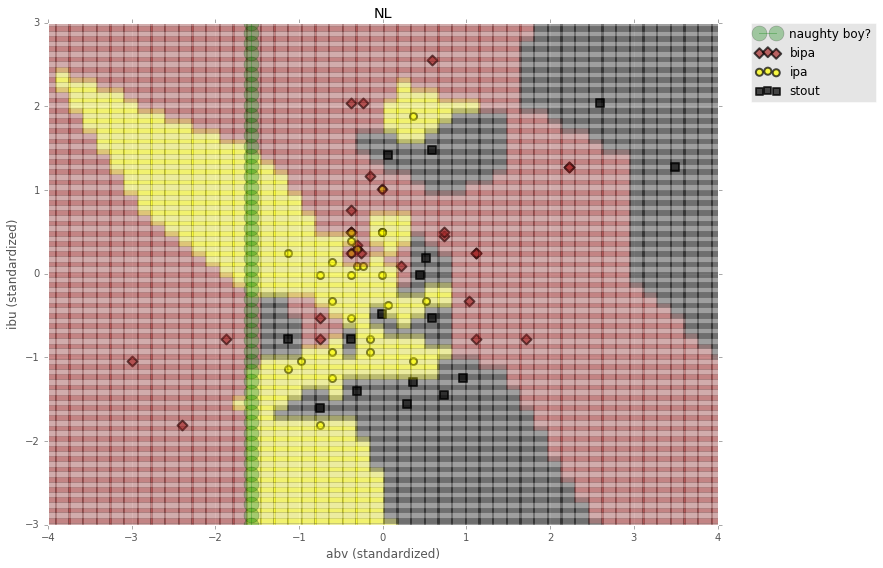

In [76]:
markers = {a:b for a,b in zip(np.unique(labels), ['D', 'o', 's'])}
colors = {a:b for a,b in zip(np.unique(labels), ['brown', 'yellow', 'black'])}

plt.figure(figsize=(12,9))

for dot in range(len(xyGrid2)):
    plt.plot(xyGrid2[dot,0], xyGrid2[dot,1], marker='s', ms=15, alpha=.3, c=colors[xyLab2[dot]])

for beer in markers:
    current_beer = labels == beer
    plt.scatter(features[current_beer][:,0], features[current_beer][:,1], 
                marker=markers[beer], c=colors[beer], edgecolor='k', lw=2, s=50, alpha=.7, label=beer
               )
    
plt.plot(nb_standardized[:,0], nb_standardized[:,1], 
         marker='o', ms=15, alpha=.3, c='green', label='naughty boy?')

plt.title('NL')
plt.xlabel('abv (standardized)')
plt.ylabel('ibu (standardized)')
plt.ylim(-3, 3)
plt.xlim(-4, 4)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [77]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [91]:
print neigh.predict(nb_standardized)
print ''
style_pred, count_pred = np.unique(neigh.predict(nb_standardized), return_counts=True)
print style_pred, count_pred

[u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa'
 u'bipa' u'ipa' u'ipa' u'ipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa'
 u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'ipa' u'ipa'
 u'ipa' u'ipa' u'ipa' u'ipa' u'ipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa'
 u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa' u'bipa'
 u'bipa' u'bipa' u'bipa' u'bipa']

[u'bipa' u'ipa'] [40 10]


In [104]:
np.hstack((neigh.predict_proba(nb_standardized), neigh.predict(nb_standardized).reshape(50,1), nb_standardized))

array([[0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -3.0],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -2.877551020408163],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -2.7551020408163267],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -2.63265306122449],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -2.510204081632653],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -2.387755102040816],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -2.2653061224489797],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -2.142857142857143],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -2.020408163265306],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -1.8979591836734695],
       [0.0, 1.0, 0.0, u'ipa', -1.5734879136948734, -1.7755102040816326],
       [0.0, 0.5, 0.5, u'ipa', -1.5734879136948734, -1.653061224489796],
       [0.0, 1.0, 0.0, u'ipa', -1.5734879136948734, -1.5306122448979593],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734

In [100]:
# np.hstack((neigh.predict_proba(nb_standardized), nb_standardized))
nb_standardized[neigh.predict_proba(nb_standardized)[:,2] > 0]

array([[-1.57348791, -1.65306122],
       [-1.57348791, -0.91836735],
       [-1.57348791, -0.79591837],
       [-1.57348791, -0.67346939],
       [-1.57348791, -0.55102041],
       [-1.57348791, -0.42857143],
       [-1.57348791, -0.30612245]])

In [133]:
# if NB has an IBU of 55 or greater, perhaps consider recategorizing to BIPA
stout_ibus = [-1.65306122, -0.30612245]
for ibu in stout_ibus:
    print ibu * features_std[1] + features_mean[1]
    
print "\n55 IBU standardized: ", (55. - features_mean[1])/features_std[1] 

28.095618217
54.3213064152

55 IBU standardized:  -0.271265072934


In [105]:
nb_style = np.hstack((neigh.predict_proba(nb_standardized), neigh.predict(nb_standardized).reshape(50,1), nb_standardized))
nb_style[:5]

array([[0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -3.0],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -2.877551020408163],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -2.7551020408163267],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -2.63265306122449],
       [0.5, 0.5, 0.0, u'bipa', -1.5734879136948734, -2.510204081632653]], dtype=object)

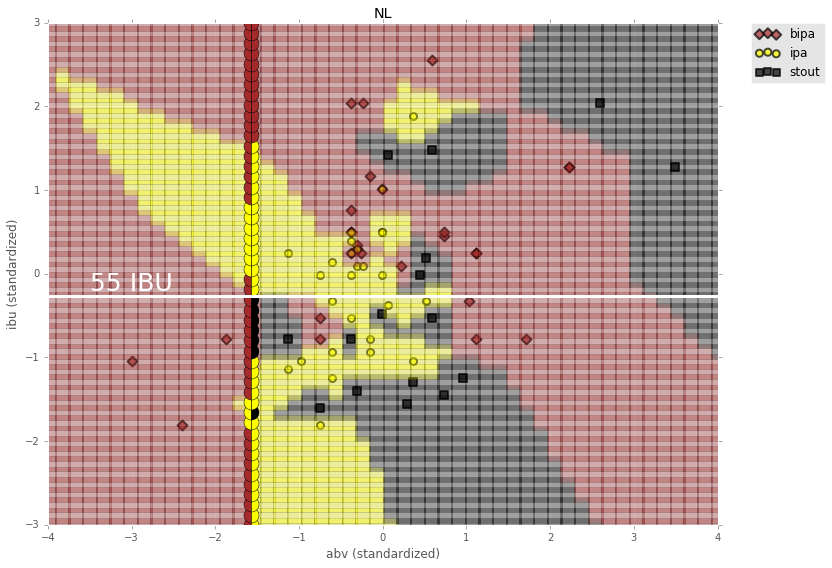

In [141]:
markers = {a:b for a,b in zip(np.unique(labels), ['D', 'o', 's'])}
colors = {a:b for a,b in zip(np.unique(labels), ['brown', 'yellow', 'black'])}

plt.figure(figsize=(12,9))

for dot in range(len(xyGrid2)):
    plt.plot(xyGrid2[dot,0], xyGrid2[dot,1], marker='s', ms=15, alpha=.3, c=colors[xyLab2[dot]])

for beer in markers:
    current_beer = labels == beer
    plt.scatter(features[current_beer][:,0], features[current_beer][:,1], 
                marker=markers[beer], c=colors[beer], edgecolor='k', lw=2, s=50, alpha=.7, label=beer
               )
    
# plt.plot(nb_standardized[:,0], nb_standardized[:,1], 
#          marker='o', ms=15, alpha=.3, c='green', label='naughty boy?')

for nb in nb_style:
    abv = nb[4]
    ibu = nb[5]
    color_list = []
    for prob in range(3):
        if nb[prob] > 0:
            color_list.append(colors[np.unique(labels)[prob]])
    plt.plot(abv, ibu, marker='o', ms=15, c=color_list[0], 
             markerfacecoloralt=color_list[-1],
             fillstyle='left',
#              label='naught boy!'            
            )

plt.plot(xABV2, np.ones(50)* -0.271265072934, 'w-', linewidth=3)
plt.text(-3.5, -0.2, '55 IBU', color='w', fontsize=25)

plt.title('NL')
plt.xlabel('abv (standardized)')
plt.ylabel('ibu (standardized)')
plt.ylim(-3, 3)
plt.xlim(-4, 4)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)